
Importing modules...


Loading parameters...


Calculating absorbance spectrum...
Calculation time: 

  0.325362 seconds (5.42 M allocations: 455.666 MiB, 15.68% gc time)


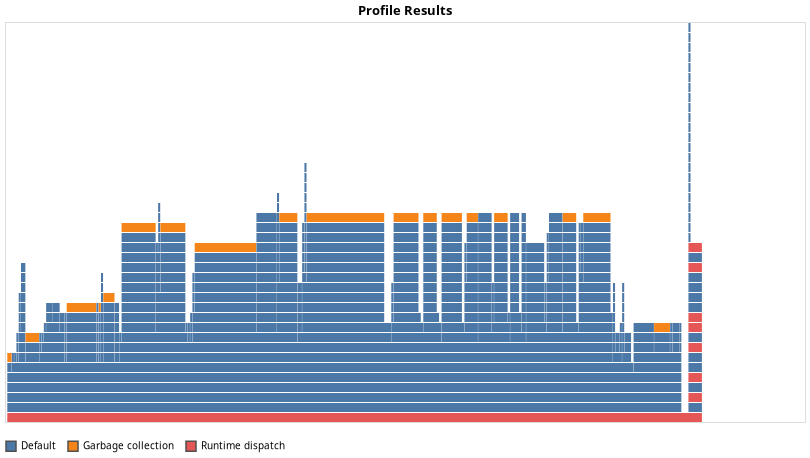

In [1]:
println("\nImporting modules...")

include("src/nanoconc.jl")
using CSV
using DataFrames
using Profile, ProfileVega

println("Loading parameters...")

refmed = 1.333 # refractive index of the medium
wavel1, wavel2 = 250.0, 900.0 # wavelengths to calculate between
numval = 0x00001000 # number of values to calculate in spectrum
particledata = [2.5 1.0
    5.0 1.0
    10.0 1.0
    20.0 1.0
    30.0 1.0
    40.0 1.0
    50.0 1.0
    60.0 1.0
    70.0 1.0
    80.0 1.0
    90.0 1.0
    100.0 1.0]
materialdata = nanoconc.loadmaterial("Gold", disp=false)
ppml = 10000.0 # particles per ml nanoconc.quantumcalc.numtomol(ppml) -> conc
d0 = 1.0 # path length
params = (refmed, wavel1, wavel2, numval, particledata, materialdata, ppml, d0)
spectrum = nanoconc.abspredict(params...)

println("Calculating absorbance spectrum...")
print("Calculation time: ")

@time spectrum = nanoconc.abspredict(params...)
CSV.write("abs.csv", DataFrame(spectrum, :auto), writeheader=false)

ProfileVega.@profview nanoconc.abspredict(params...)